In [1]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
from scipy.interpolate import griddata

X = mpimg.imread('X.png') 


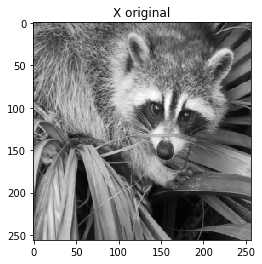

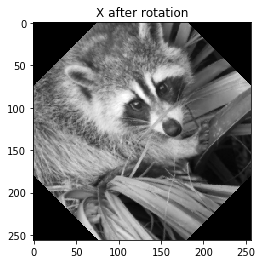

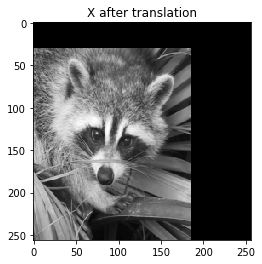

In [7]:
def Rotate2D(img_m,theta):
    xmax=img_m.shape[0]
    ymax=img_m.shape[1]

    x0=np.linspace(-(xmax/2) +1,xmax/2,xmax)   #x,y[-127,128]
    y0=np.linspace(-(ymax/2) +1,ymax/2,ymax)
    y,x=np.meshgrid(x0,y0)
    x_t=np.zeros([xmax,ymax])
    y_t=np.zeros([xmax,ymax])
    T=[1,theta,0,0]
    Trans=([T[0]*np.cos(T[1]),-T[0]*np.sin(T[1]),T[2]],[T[0]*np.sin(T[1]),T[0]*np.cos(T[1]),T[3]],[0,0,1])
    for i in range(xmax):
        for j in range(ymax):
          
            index=np.array([x[i,j],y[i,j],1])
            T_index=np.dot(Trans,index)
            T_index=np.array(T_index)
            x_t[i,j]=T_index[0]
            y_t[i,j]=T_index[1]
   
    img_moved = griddata((x_t.flatten(),y_t.flatten()), img_m.flatten(), (x, y), method='linear',fill_value=0)#resample

    return img_moved

def Translate2D(img_m,T):
    xmax=img_m.shape[0]
    ymax=img_m.shape[1]

    x0=np.linspace(-(xmax/2) +1,xmax/2,xmax)   #x,y[-127,128]
    y0=np.linspace(-(ymax/2) +1,ymax/2,ymax)
    y,x=np.meshgrid(x0,y0)
    x_t=np.zeros([xmax,ymax])
    y_t=np.zeros([xmax,ymax])
    
    Trans=([T[0]*np.cos(T[1]),-T[0]*np.sin(T[1]),T[2]],[T[0]*np.sin(T[1]),T[0]*np.cos(T[1]),T[3]],[0,0,1])
    for i in range(xmax):
        for j in range(ymax):
          
            index=np.array([x[i,j],y[i,j],1])
            T_index=np.dot(Trans,index)
            T_index=np.array(T_index)
            x_t[i,j]=T_index[0]
            y_t[i,j]=T_index[1]
   
    img_moved = griddata((x_t.flatten(),y_t.flatten()), img_m.flatten(), (x, y), method='linear',fill_value=0)#resample

    return img_moved

X1=Rotate2D(X,np.pi/4)
T=[1,0,30,-70]
X2=Translate2D(X,T)
mpimg.imsave('RotatedX.png',X1)
mpimg.imsave('ShiftedX.png',X2)
plt.imshow(X) 
plt.gray()
plt.title('X original')
plt.show()


plt.imshow(X1) 
plt.gray()
plt.title('X after rotation')
plt.show()

plt.imshow(X2) 
plt.gray()
plt.title('X after translation')
plt.show()

In [5]:
img_m=X
T=[1,0,30,-70]
xmax=img_m.shape[0]
ymax=img_m.shape[1]

x0=np.linspace(-(xmax/2) +1,xmax/2,xmax)   #x,y[-127,128]
y0=np.linspace(-(ymax/2) +1,ymax/2,ymax)
x,y=np.meshgrid(x0,y0)
x_t=np.zeros([xmax,ymax])
y_t=np.zeros([xmax,ymax])

Trans=([T[0]*np.cos(T[1]),-T[0]*np.sin(T[1]),T[2]],[T[0]*np.sin(T[1]),T[0]*np.cos(T[1]),T[3]],[0,0,1])
for i in range(xmax):
    for j in range(ymax):

        index=np.array([x[i,j],y[i,j],1])
        T_index=np.dot(Trans,index)
        T_index=np.array(T_index)
        x_t[i,j]=T_index[0]
        y_t[i,j]=T_index[1]

img_moved = griddata((x_t.flatten(),y_t.flatten()), img_m.flatten(), (x, y), method='linear',fill_value=0)#resample

print(x,x_t)

[[-127. -126. -125. ...  126.  127.  128.]
 [-127. -126. -125. ...  126.  127.  128.]
 [-127. -126. -125. ...  126.  127.  128.]
 ...
 [-127. -126. -125. ...  126.  127.  128.]
 [-127. -126. -125. ...  126.  127.  128.]
 [-127. -126. -125. ...  126.  127.  128.]] [[-97. -96. -95. ... 156. 157. 158.]
 [-97. -96. -95. ... 156. 157. 158.]
 [-97. -96. -95. ... 156. 157. 158.]
 ...
 [-97. -96. -95. ... 156. 157. 158.]
 [-97. -96. -95. ... 156. 157. 158.]
 [-97. -96. -95. ... 156. 157. 158.]]
